## DATA PREPAREATION

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data="customer.csv"
df=pd.read_csv(data)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns=df.columns.str.lower().str.replace(" ","_")

categorical_columns=list(df.dtypes[df.dtypes=="object"].index)

for c in categorical_columns: 
    df[c]=df[c] .str.lower().str.replace(" ","_")

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
tc=pd.to_numeric(df.totalcharges, errors="coerce")

In [10]:
tc.isnull().sum()

np.int64(11)

In [11]:
df[tc.isnull()][["customerid","totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [12]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges=df.totalcharges.fillna(0)

In [13]:
df.totalcharges.isnull().sum()

np.int64(0)

In [14]:
df.churn=(df.churn =="yes").astype(int)

In [15]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## SETTING UP THE VALIDATION FRAMENWORK 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [18]:
len(df_train),len(df_val),len(df_test)

(4225, 1409, 1409)

In [19]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [20]:
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

In [21]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## EDA 

In [22]:
df_full_train=df_full_train.reset_index(drop=True)


In [23]:
df_full_train.isnull().sum()


customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [24]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [25]:
global_churn_rate=df_full_train.churn.mean()
np.round(global_churn_rate,2)

np.float64(0.27)

In [26]:
df_full_train.dtypes, df_full_train.columns

(customerid           object
 gender               object
 seniorcitizen         int64
 partner              object
 dependents           object
 tenure                int64
 phoneservice         object
 multiplelines        object
 internetservice      object
 onlinesecurity       object
 onlinebackup         object
 deviceprotection     object
 techsupport          object
 streamingtv          object
 streamingmovies      object
 contract             object
 paperlessbilling     object
 paymentmethod        object
 monthlycharges      float64
 totalcharges        float64
 churn                 int64
 dtype: object,
 Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
        'tenure', 'phoneservice', 'multiplelines', 'internetservice',
        'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
        'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
        'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
       dtyp

In [27]:
numerical =['tenure','monthlycharges', 'totalcharges']
categorical =['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 
            'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod']

In [28]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## FEATURE IMPORTANCE 

### CHURN RATE 

In [29]:
churn_female=df_full_train[df_full_train["gender"]=="female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [30]:
churn_male=df_full_train[df_full_train["gender"]=="male"].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [31]:
global_churn_rate=df_full_train.churn.mean()
global_churn_rate

np.float64(0.26996805111821087)

In [32]:
churn_partner=df_full_train[df_full_train["partner"]=="yes"].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [33]:
churn_no_partner=df_full_train[df_full_train["partner"]=="no"].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

#### DIFERENCIE 

In [34]:
global_churn_rate - churn_partner

np.float64(0.06493474245795922)

In [35]:
global_churn_rate - churn_no_partner

np.float64(-0.05984095297455855)

#### RISK_RATIO


In [36]:
global_churn_rate / churn_partner

np.float64(1.3167033828906243)

In [37]:
global_churn_rate / churn_no_partner

np.float64(0.8185587651278121)

In [38]:
from IPython.display import display  

In [39]:
for c in categorical:
     print(c)
     df_group=df_full_train.groupby(c).churn.agg(["mean","count"])
     df_group["diff"]=df_group["mean"]-global_churn_rate
     df_group["risk"]=df_group["mean"]/global_churn_rate
     display(df_group)
     print(" ")
     print(" ")

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


 
 
seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


 
 
partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


 
 
dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


 
 
phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


 
 
multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


 
 
internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


 
 
onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


 
 
onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


 
 
deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


 
 
techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


 
 
streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


 
 
streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


 
 
contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


 
 
paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


 
 
paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## FEATURE IMPORTANCE: MUTUAL INFORMATION

In [40]:
from sklearn.metrics import mutual_info_score

In [41]:
mutual_info_score(df_full_train.gender,df_full_train.churn)

0.0001174846211139946

In [42]:
mutual_info_score(df_full_train.contract,df_full_train.churn)

0.0983203874041556

In [43]:
def mutual_info_df(var):
    return mutual_info_score(var,df_full_train.churn)    

In [44]:
df_full_train[categorical].apply(mutual_info_df).sort_values()

gender              0.000117
phoneservice        0.000229
multiplelines       0.000857
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
paperlessbilling    0.017589
streamingmovies     0.031581
streamingtv         0.031853
paymentmethod       0.043210
deviceprotection    0.043453
onlinebackup        0.046923
internetservice     0.055868
techsupport         0.061032
onlinesecurity      0.063085
contract            0.098320
dtype: float64

## FEATURE IMPORTANCE: CORRELATION

In [45]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [46]:
df_full_train[df_full_train.tenure < 2].churn.mean()

np.float64(0.6247464503042597)

In [47]:
df_full_train[(df_full_train.tenure>=2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.41798107255520506)

In [48]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [49]:
df_full_train[df_full_train.tenure <= 20].churn.mean()

np.float64(0.43863439930855663)

In [50]:
df_full_train[(df_full_train.tenure> 20) & (df_full_train.tenure <= 50)].churn.mean()

np.float64(0.2147165259348613)

In [51]:
df_full_train[df_full_train.tenure > 50].churn.mean()

np.float64(0.09025270758122744)

## ONE-HOT ENCODING

In [52]:
from sklearn.feature_extraction import DictVectorizer

In [53]:
df_train[["gender","contract"]].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [54]:
train_dicts=df_train[categorical + numerical].to_dict(orient="records")

In [55]:
dv=DictVectorizer(sparse=False)

In [56]:
#dv.fit(train_dicts)
#X_train=dv.transform(train_dicts)

X_train=dv.fit_transform(train_dicts)

In [57]:
#dv.vocabulary_.keys()
#dv.get_feature_names_out()

In [58]:
val_dicts=df_val[categorical + numerical].to_dict(orient="records")
X_val=dv.transform(val_dicts)

## LOGISTIC REGRESSION

In [59]:
def sigmoid(z): 
    return 1/(1+np.exp(-z))

In [60]:
da=np.linspace(-7,7,50)

In [61]:
sigmoid(da)

array([9.11051194e-04, 1.21198177e-03, 1.61215275e-03, 2.14416814e-03,
       2.85124888e-03, 3.79061732e-03, 5.03790517e-03, 6.69285092e-03,
       8.88658872e-03, 1.17908399e-02, 1.56292700e-02, 2.06911123e-02,
       2.73467868e-02, 3.60645381e-02, 4.74258732e-02, 6.21356331e-02,
       8.10197687e-02, 1.05000585e-01, 1.35036423e-01, 1.72012833e-01,
       2.16579096e-01, 2.68941421e-01, 3.28652547e-01, 3.94467513e-01,
       4.64346329e-01, 5.35653671e-01, 6.05532487e-01, 6.71347453e-01,
       7.31058579e-01, 7.83420904e-01, 8.27987167e-01, 8.64963577e-01,
       8.94999415e-01, 9.18980231e-01, 9.37864367e-01, 9.52574127e-01,
       9.63935462e-01, 9.72653213e-01, 9.79308888e-01, 9.84370730e-01,
       9.88209160e-01, 9.91113411e-01, 9.93307149e-01, 9.94962095e-01,
       9.96209383e-01, 9.97148751e-01, 9.97855832e-01, 9.98387847e-01,
       9.98788018e-01, 9.99088949e-01])

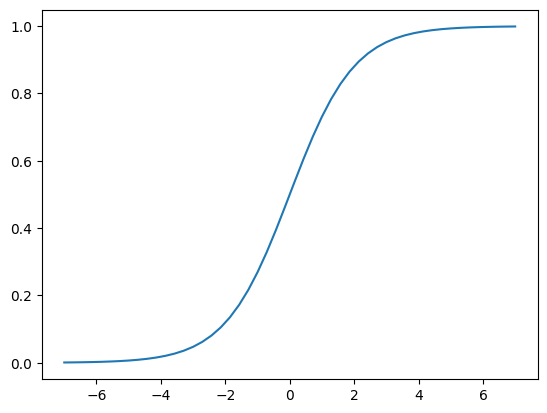

In [62]:
plt.plot(da,sigmoid(da))

In [63]:
def logistic_regression(xi):

    score=w0

    for i in range(len(w)):
        score = score + x[i]*w[i]

    result =sigmoid(score)

    return result

## TRAINING LOGISTIC REGRESSION WITH SCIKIT-LEARN

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(max_iter=10000)

In [66]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [67]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [68]:
model.intercept_[0].round(3)

np.float64(-0.045)

In [69]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [70]:
model.predict_proba(X_val)[:,1]

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [71]:
y_pred=model.predict_proba(X_val)[:,1]

In [72]:
churn_decision =y_pred >= 0.5
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [73]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [74]:
(y_val==churn_decision).mean()

np.float64(0.8034066713981547)

In [75]:
df_pred=pd.DataFrame()
df_pred["prob"]=y_pred
df_pred["pred"]=churn_decision.astype(int)
df_pred["actual"]=y_val
df_pred["correct"]=df_pred.pred==df_pred.actual
df_pred

,prob,pred,actual,correct
0,0.006624,0,0,True
1,0.204823,0,0,True
2,0.217818,0,0,True
3,0.563750,1,1,True
4,0.218675,0,0,True
...,...,...,...,...
1404,0.291307,0,0,True
1405,0.041390,0,1,False
1406,0.151496,0,0,True
1407,0.788479,1,1,True


In [76]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

### MODEL INTERPRETATION

In [77]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.685),
 'contract=one_year': np.float64(0.039),
 'contract=two_year': np.float64(-0.682),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.162),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.084),
 'onlinesecurity=no': np.float64(0.285),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [78]:
toy=["contract","tenure","monthlycharges"]

In [79]:
toy_train_dicts=df_train[toy].to_dict(orient="records")  #corpus_train to dictionary


toy_dv=DictVectorizer(sparse=False) # create a vertorizer


toy_X_train=toy_dv.fit_transform(toy_train_dicts)   # Fit a vectorizer to dict_corpus_train


toy_val_dicts=df_train[toy].iloc[:10].to_dict(orient="records") #corpus_val to dictionary


toy_X_val=toy_dv.transform(toy_val_dicts) # transform dict_corpus_val

In [80]:
toy_dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [81]:
toy_model=LogisticRegression()
toy_model.fit(toy_X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
w0=toy_model.intercept_[0]
w0

np.float64(-2.477957595829565)

In [83]:
w=toy_model.coef_[0]
w

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [84]:
dict(zip(toy_dv.get_feature_names_out(),toy_model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [85]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [86]:
sigmoid(_) 

np.float64(0.41824062315816374)

## USING MODEL

In [87]:
full_train_dicts=df_full_train[categorical + numerical].to_dict(orient="records")  #corpus_train to dictionary


full_dv=DictVectorizer(sparse=False) # create a vertorizer


X_full_train=full_dv.fit_transform(full_train_dicts)   # Fit a vectorizer to dict_corpus_train


test_dicts=df_test[categorical + numerical].to_dict(orient="records") #corpus_test to dictionary


X_test=full_dv.transform(test_dicts) # transform dict_corpus_test

In [88]:
y_full_train=df_full_train.churn.values

In [89]:
full_model=LogisticRegression(max_iter=10000)

full_model.fit(X_full_train,y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [90]:
y_pred=model.predict_proba(X_test)[:,1]

In [91]:
churn_decision=(y_pred >= 0.5)

In [92]:
(churn_decision==y_test).mean()

np.float64(0.8112136266855926)

In [93]:
customer=test_dicts[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [94]:
x_customer=full_dv.transform([customer])
full_model.predict_proba(x_customer)[0,1]

np.float64(0.47632824241018595)

In [95]:
y_test[10]

np.int64(0)